# Notebook 3 A - Tutorial: Generating a new Data Set and a Polynomial Model

## 3.A.1

Generating a new training data set.

We want to explore the linear model (and more complex ones) and their behavior in training. Therefore, we now switch the perspective and start to work from synthetic data. As an advantage, as we have created this data and exactly know the properties of the data. 

You will create a dataset based on the sine function. The goal is to generate a specified number of data points for $ x $ values in the range $[0, 2\pi]$, and compute the corresponding $ y $ values as the sine of $ x $ with some added random noise. This synthetic data will be used to test the performance of various models.



Task: 

* Compute the corresponding $ y $ values - Calculate the sine of each $x$ value.
* Add random noise to the $y$ values. The noise should be sampled from a normal distribution with mean 0 and the specified standard deviation (`noise` parameter).

In [25]:
import numpy as np

def generate_sine_data(n_points, noise=0.2):
    """
    Generates a synthetic dataset based on the sine function with added noise.

    Parameters:
    n_points (int): The number of data points to generate.
    noise (float): The standard deviation of the noise to add to the sine values.

    Returns:
    tuple: Two numpy arrays, x and y, where x is in the range [0, 2*pi] and
           y is the sine of x with added noise.
    """
    # Generate linearly spaced x values between 0 and 2*pi
    x = np.linspace(0, 2 * np.pi, n_points)
    
    # TODO: Compute the sine on the x values and add some noise
    # Create the y values in return.
    # Compute the sine of each x value
    y = np.sin(x)
    # Add random noise to y values
    y += np.random.normal(0, noise, size=n_points)
    
    return x, y

# Example usage:
x_data, y_data = generate_sine_data(8, 0.1)


Next, you should visualize your data and show in addition the sine function in the same plot.

Task:

* Generate the Data - create two datasets using the generate_sine_data function. The first dataset should represent the real sine function, with 100 data points and no noise. The second dataset should represent the noisy sine data, but only use $8$ data points and experiment with noise (in the end, continue to work with relatively high noise with a standard deviation of 1.).
* Create a Figure with Two Plots using matplotlib.

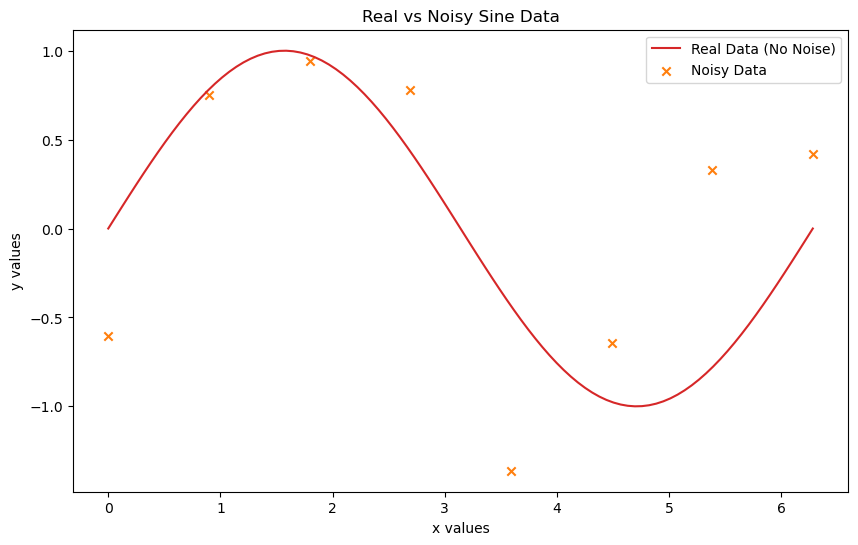

In [26]:
import matplotlib.pyplot as plt

# Generate real data (100 data points, no noise)
x_real, y_real = generate_sine_data(100, noise=0.0)

# Generate noisy data (100 data points, with noise)
x_noisy, y_noisy = generate_sine_data(8, noise=1.0)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the real sine data
plt.plot(x_real, y_real, label='Real Data (No Noise)', color='C3')

# Plot the noisy sine data
plt.scatter(x_noisy, y_noisy, label='Noisy Data', color='C1', marker='x')

# Add labels and legend
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Real vs Noisy Sine Data')
plt.legend()

# Show the plot
plt.show()


---


## 3.A.2 The Linear Model

Below, you find the linear model slightly refactored. Basically, there are two important steps in the process:

* prediction = taking inputs and generating predictions for these (using the learned parameters) -- this will be called the **forward pass**
* fit = adapt the parameters to better fit the given output (we are in supervised learning) -- in this case, we are working backwards from the target values (the given y values) and, therefore, this is called the **backward pass**

Briefly go over the code and understand, how this is implemented (you don't have to do anything else!).

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error

class GradientDescentModel:
    """
    A simple linear regression model that performs gradient descent manually.
    It uses an array of weights to represent the model parameters.
    """
    
    def __init__(self, learning_rate=0.0001, n_iterations=1000):
        self.weights = np.array([0.1, 0.1])  # Initialize weights for [intercept, slope]
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        self.n_iterations = n_iterations  # Set number of iterations for gradient descent
        self.mse_history = []  # List to store MSE at each iteration

    def fit(self, X, y):
        """
        Fit the model using gradient descent. Adjust weights iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n = len(X)  # Number of data points
        
        for _ in range(self.n_iterations):
            # Compute gradients for the entire dataset
            gradient_intercept, gradient_slope = self.compute_gradient(X, y)

            # Update weights using the computed gradients
            self.weights[0] -= self.learning_rate * gradient_intercept  # Update intercept
            self.weights[1] -= self.learning_rate * gradient_slope      # Update slope

            # Calculate Mean Squared Error for the current iteration and store it
            self.mse_history.append(mean_squared_error(y, self.predict(X)))

    def compute_gradient(self, X, y):
        """
        Compute the gradients for the intercept and slope based on the entire dataset.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The input feature values.
        y : list or array-like, shape (n_samples,)
            The target values.

        Returns:
        tuple: Gradients for the intercept and slope.
        """
        n = len(X)  # Number of data points

        # Predict using the current weights for all samples
        y_pred = self.weights[1] * X + self.weights[0]

        # Calculate the gradients for the intercept and slope
        gradient_intercept = (-2 / n) * np.sum(y - y_pred)
        gradient_slope = (-2 / n) * np.sum(X * (y - y_pred))

        # Return the computed gradients
        return gradient_intercept, gradient_slope

    def predict(self, X):
        """
        Predict method for making predictions using the trained model (forward pass).

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's weights.
        """
        # Forward pass: calculate the predicted value using the linear equation
        # y_pred = weights[1] * x + weights[0]
        return [self.weights[1] * x + self.weights[0] for x in X]
    
    def get_mse_history(self):
        """
        Get the history of MSE values during the learning process.

        Returns:
        mse_history : list
            A list of MSE values recorded at each iteration.
        """
        return self.mse_history


We now can use this code to fit the model and predict corresponding values on our new data set. In addition, we visualize this:

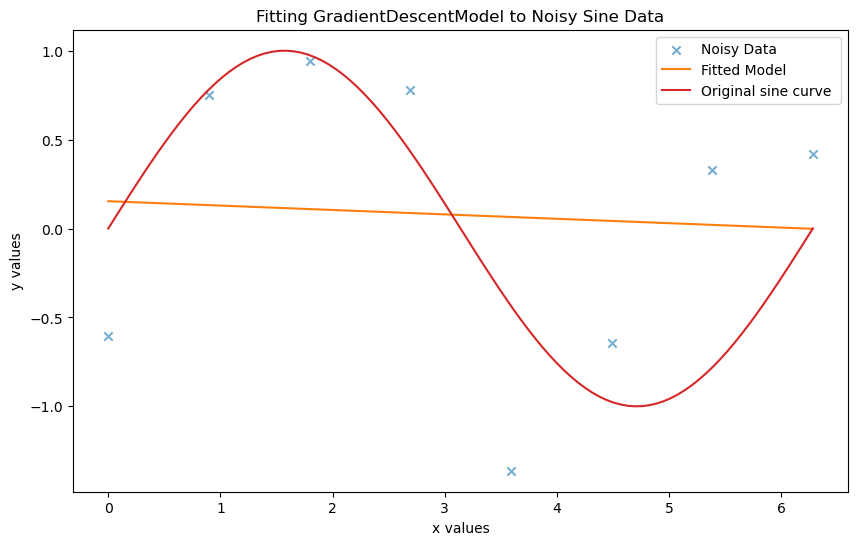

Final MSE for our implementation of the linear model: 0.6128


In [28]:
# Reshape x_noisy to a 1D array for the model (in case it's not already)
#x_noisy = x_noisy.flatten()

# Create and fit the GradientDescentModel to the noisy data
model = GradientDescentModel(learning_rate=0.01, n_iterations=1000)
model.fit(x_noisy, y_noisy)

# Predict using the fitted model
y_pred = model.predict(x_noisy)

# Plot the noisy data and the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_noisy, y_noisy, label='Noisy Data', color='C0', alpha=0.6, marker='x')
plt.plot(x_noisy, y_pred, label='Fitted Model', color='C1')
plt.plot(x_real, y_real, label='Original sine curve ', color='C3')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Fitting GradientDescentModel to Noisy Sine Data')
plt.legend()
plt.show()

# Print final MSE
final_mse = mean_squared_error(y_noisy, y_pred)
print(f"Final MSE for our implementation of the linear model: {final_mse:.4f}")


Next (you still don't have to implement anything ...), we will look how this is realized in the scikit-learn Framework ([documentation for the linear model can be found here](https://scikit-learn.org/stable/modules/linear_model.html)): 

While 'sklearn' uses the same interface as we have introduced in the previous weeks for our model implementation, it is quite general: Therefore, it always assumes input data to be represented as an 'numpy.array' of the shape '(samples, feature_dimension)'. In our case, the current input x was created simply as an array without an explicit number of features and we have to reshape this ('x_noisy.shape' was '(8,)' and will be reshaped to '(8,1)').

Task:

* Again, just go through the code and understand the interface.

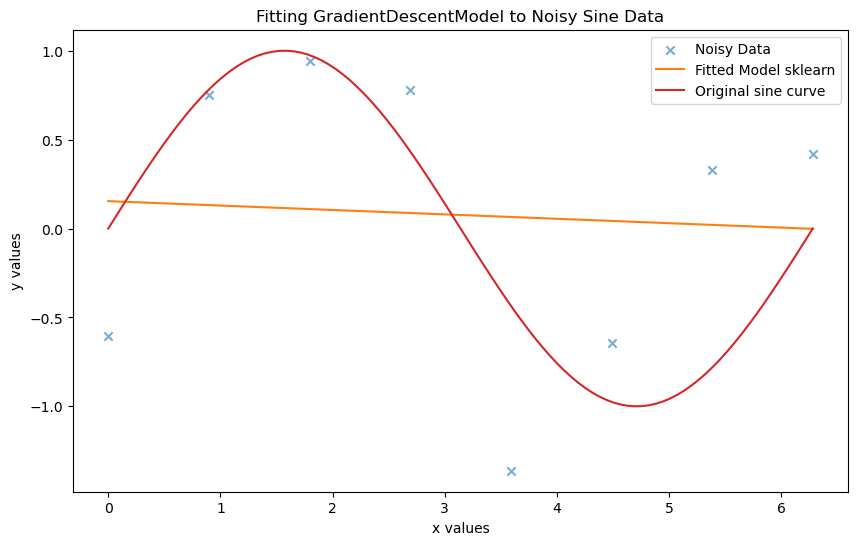

Linear Model MSE (sklearn implementation): 0.6128


In [29]:
from sklearn.linear_model import LinearRegression

# Reshape x to be a 2D array for sklearn
x_noisy_sk = x_noisy.reshape(-1, 1)

# 1. Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_noisy_sk, y_noisy)
y_linear_pred_sk = linear_model.predict(x_noisy_sk)

# Plot the noisy data and the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_noisy, y_noisy, label='Noisy Data', color='C0', alpha=0.6, marker='x')
plt.plot(x_noisy, y_linear_pred_sk, label='Fitted Model sklearn', color='C1')
plt.plot(x_real, y_real, label='Original sine curve ', color='C3')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Fitting GradientDescentModel to Noisy Sine Data')
plt.legend()
plt.show()

# Calculate Mean Squared Error for both models
mse_linear = mean_squared_error(y_noisy, y_linear_pred_sk)

# Print the MSE for comparison
print(f"Linear Model MSE (sklearn implementation): {mse_linear:.4f}")

---

## 3.A.3

Last, extend the linear model and make this a polynomial regression model (use degree 3 -- $w_3 * x^3 + w_2 * x^2 + w_1 * x + w_0$). The goal is to compare how well these models fit the data by calculating the Mean Squared Error (MSE) for each model. 

Your tasks:

* Change the prediction step, the forward pass applying the polynomial.
* Change the fit method -- this means you have to change the gradient (with respect to the specific weights)

#### Reminder on Derivative

For the derivative, we are looking at the Mean Squared Error between the target value for $y$ and the predicted value given $x$ and applying the polynomials. The gradient should be with respect to the individual weights. Given a polynomial model of degree 3:

$$
y_{\text{pred}} = w_0 + w_1 x + w_2 x^2 + w_3 x^3
$$
where:
- $w_0, w_1, w_2,$ and $w_3$ are the weights (parameters) of the model.
- $x$ is the input feature.
- $y_{\text{pred}}$ is the predicted output.

The **Mean Squared Error (MSE)** for a dataset with $n $ data points is given by:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - y_{\text{pred}, i})^2
$$
where:
- $y_i$ is the true value for the $i$-th data point.
- $y_{\text{pred}, i}$ is the predicted value for the $i$-th data point.

Substituting the expression for $y_{\text{pred}}$, we get:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left(y_i - (w_0 + w_1 x_i + w_2 x_i^2 + w_3 x_i^3)\right)^2
$$

As an example: For $w_2$ we are interested the derivative of MSE with Respect to $w_2$: 

$$
\frac{\partial \text{MSE}}{\partial w_2}
$$

which we can compute using the chain rule.

Solution: The gradient of the MSE with respect to $w_2$ is (the later part is our predicted value):
$$
\frac{\partial \text{MSE}}{\partial w_2} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (w_0 + w_1 x_i + w_2 x_i^2 + w_3 x_i^3)) x_i^2
$$

This derivative can be used in gradient descent to update the weight $w_2$ iteratively.



In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error

class PolynomialGradientDescentModel:
    """
    A polynomial regression model (degree 3) that performs gradient descent manually.
    It uses an array of weights to represent the model parameters for a cubic polynomial.
    """
    
    def __init__(self, learning_rate=0.0001, n_iterations=1000):
        self.weights = np.array([0.1, 0.1, 0.1, 0.1])  # Initialize weights for [intercept, x, x^2, x^3]
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        self.n_iterations = n_iterations  # Set number of iterations for gradient descent
        self.mse_history = []  # List to store MSE at each iteration

    def fit(self, X, y):
        """
        Fit the model using gradient descent. Adjust weights iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable.
        y : list or array-like, shape (n_samples,)
            The dependent variable.
        """
        n = len(X)  # Number of data points
        
        for _ in range(self.n_iterations):
            # Compute gradients for the entire dataset
            gradients = self.compute_gradient(X, y)

            # Update weights using the computed gradients
            for j in range(len(self.weights)):
                self.weights[j] -= self.learning_rate * gradients[j]

            # Calculate Mean Squared Error for the current iteration and store it
            self.mse_history.append(mean_squared_error(y, self.predict(X)))

    def compute_gradient(self, X, y):
        """
        Compute the gradients for the weights based on the entire dataset.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The input feature values.
        y : list or array-like, shape (n_samples,)
            The target values.

        Returns:
        list: Gradients for each weight.
        """
        n = len(X)  # Number of data points

        # Predict using the current weights for all samples
        y_pred = self.predict(X)

        # Calculate the gradients for each weight
        gradient_intercept = (-2 / n) * np.sum(y - y_pred)
        gradient_w = (-2 / n) * np.sum(X * (y - y_pred))
        gradient_w2 = (-2 / n) * np.sum((X ** 2) * (y - y_pred))
        gradient_w3 = (-2 / n) * np.sum((X ** 3) * (y - y_pred))

        # Return the computed gradients
        return [gradient_intercept, gradient_w, gradient_w2, gradient_w3]

    def predict(self, X):
        """
        Predict method for making predictions using the trained model (forward pass).

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's weights.
        """
        # Forward pass: calculate the predicted value using the cubic equation
        # y_pred = weights[0] + weights[1] * x + weights[2] * x^2 + weights[3] * x^3
        return [self.weights[0] + self.weights[1] * x + self.weights[2] * (x ** 2) + self.weights[3] * (x ** 3) for x in X]
    
    def get_mse_history(self):
        """
        Get the history of MSE values during the learning process.

        Returns:
        mse_history : list
            A list of MSE values recorded at each iteration.
        """
        return self.mse_history

And again, we want to fit our model to the training data (this is getting much more sensitive and we have to use a smaller learning rate and longer training times!). 

How good is this model compared to the linear model?

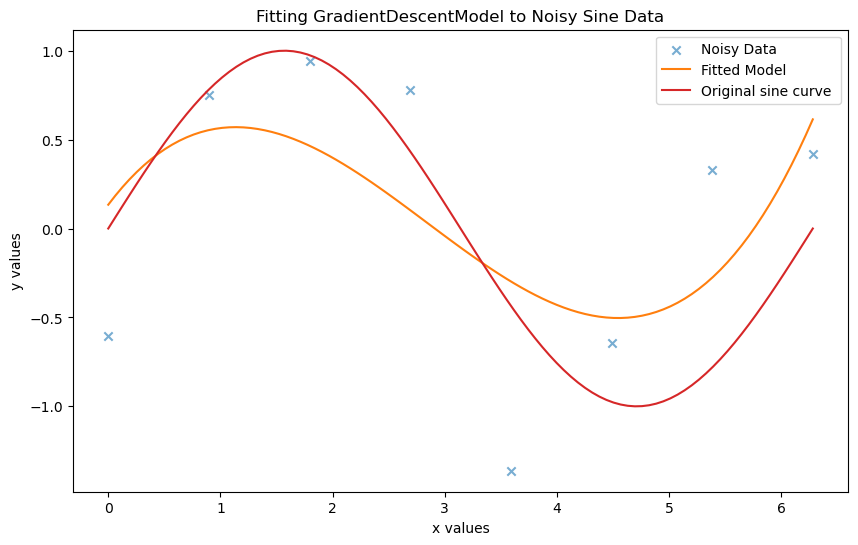

Final MSE for our implementation of the linear model: 0.3524


In [31]:
# Create and fit the GradientDescentModel to the noisy data
model = PolynomialGradientDescentModel(learning_rate=0.00005, n_iterations=100000) # You will need to run this for quite a longer time! Use 10^5
model.fit(x_noisy, y_noisy)

# Predict using the fitted model -- we will use x_real as it samples much more points for the fitted model
y_poly_pred = model.predict(x_noisy)
y_poly_real = model.predict(x_real)

# Plot the noisy data and the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_noisy, y_noisy, label='Noisy Data', color='C0', alpha=0.6, marker='x')
plt.plot(x_real, y_poly_real, label='Fitted Model', color='C1')
plt.plot(x_real, y_real, label='Original sine curve ', color='C3')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Fitting GradientDescentModel to Noisy Sine Data')
plt.legend()
plt.show()

# Print final MSE
final_mse = mean_squared_error(y_noisy, y_poly_pred)
print(f"Final MSE for our implementation of the linear model: {final_mse:.4f}")


### Polynomial in scikit-learn

Last, you should as well look at the implementation of a polynomial (which looks different from our approach -- but consider why this is the same). 
In scikit-learn, learning a polynomial regression model involves two main steps:

1. **Feature Transformation:** Use 'PolynomialFeatures' to transform the original input features into polynomial features up to a specified degree. For example, if the input is a single feature 
$x$ and we choose a degree of $3$, the transformation creates new features (overall $4$ as is our weight number): $1, x, x^2, x^3$. This effectively maps the original feature space into a higher-dimensional polynomial space.
2. Linear Regression: Apply 'LinearRegression' to fit a linear model in the transformed polynomial feature space. Even though the original input was transformed into polynomial terms, the 'LinearRegression' model treats these terms as linear combinations of the weights. The model learns the coefficients for each polynomial term, enabling it to capture the polynomial relationship in the original input data.

Together, these steps allow scikit-learn to learn a polynomial regression model by converting the problem into a linear regression task in a higher-dimensional feature space.

Task:

* Understand the implementation, for further explanation [see documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).
* Test different degrees of polynomials for our model.

Shape of the poly features for data points:  (8, 4)
Shape of the poly features for 100 points:   (100, 4)


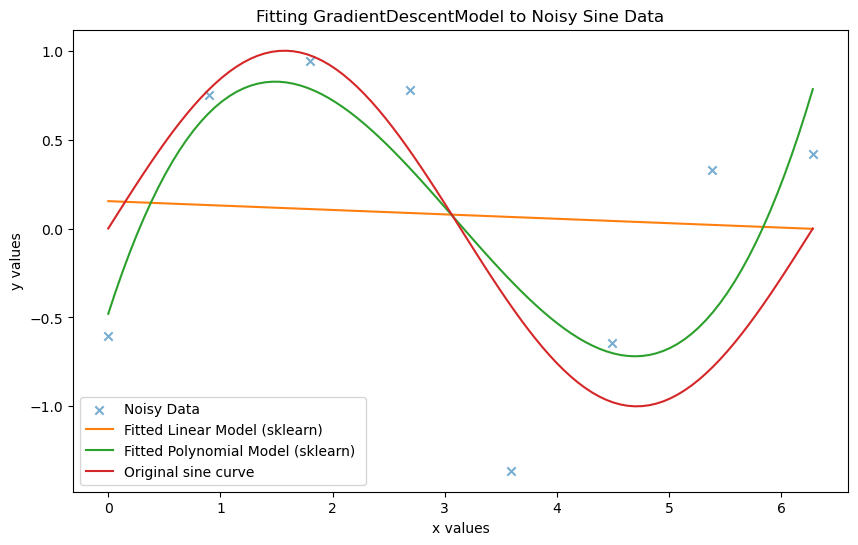

Linear Model MSE: 0.6128
Polynomial Model (Degree 3) MSE: 0.2712


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Reshape x to be a 2D array for sklearn
x_noisy_sk = x_noisy.reshape(-1, 1)
x_real_sk = x_real.reshape(-1, 1)

# 1. Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_noisy_sk, y_noisy)
y_linear_pred_sk = linear_model.predict(x_noisy_sk)

# 2. Polynomial Regression Model (degree 3)
poly_features = PolynomialFeatures(degree=3)
x_poly_sk = poly_features.fit_transform(x_noisy_sk)
print("Shape of the poly features for data points: ", x_poly_sk.shape)
x_poly_real_sk = poly_features.fit_transform(x_real_sk)
print("Shape of the poly features for 100 points:  ", x_poly_real_sk.shape)

polynomial_model = LinearRegression()
polynomial_model.fit(x_poly_sk, y_noisy)
y_poly_pred_sk = polynomial_model.predict(x_poly_sk)
y_poly_real_sk = polynomial_model.predict(x_poly_real_sk)

# Plot the noisy data and the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_noisy, y_noisy, label='Noisy Data', color='C0', alpha=0.6, marker='x')
plt.plot(x_noisy_sk, y_linear_pred_sk, label='Fitted Linear Model (sklearn) ', color='C1')            
plt.plot(x_real_sk, y_poly_real_sk, label='Fitted Polynomial Model (sklearn) ', color='C2')
plt.plot(x_real, y_real, label='Original sine curve ', color='C3')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Fitting GradientDescentModel to Noisy Sine Data')
plt.legend()
plt.show()

# Calculate Mean Squared Error for both models
mse_linear = mean_squared_error(y_noisy, y_linear_pred_sk)
mse_poly = mean_squared_error(y_noisy, y_poly_pred_sk)

# Print the MSE for comparison
print(f"Linear Model MSE: {mse_linear:.4f}")
print(f"Polynomial Model (Degree 3) MSE: {mse_poly:.4f}")


<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 21.10.2024; Explanations were initially generated and afterwards edited;</i>
</div>